In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import os
import csv
import time

In [2]:

fle = "/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/2016_10_19__11_23_51_424_220_450_test.txt"

#fle = os.path.join("D:\\Dropbox\\SonicationBehavior\\SonBehData\\2016_10_19__11_23_51_424_220_450_test.txt")

exx = np.transpose(pd.read_csv(fle, sep = " ", header = None))

In [3]:
exx.head()

,0,1
0,0.000000,-0.014654
1,0.000005,-0.015952
2,0.000010,-0.015628
3,0.000015,-0.014654
4,0.000020,-0.015303


In [4]:
len(exx)

20000

In [5]:
# convert data to m/s/s
data = np.array(exx.loc[:,1])*1000 / 10.17
data = data - np.mean(data)

log_rate = 200000.0

n =len(data) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(data)/n * 2# fft computing and normalization
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

In [6]:
# plot envelope
from scipy import signal
xs = np.array(range(len(exx)))/ float(log_rate)
data = data
peakind = signal.find_peaks_cwt(data, widths = [70])
#peakind, xs[peakind], data[peakind]


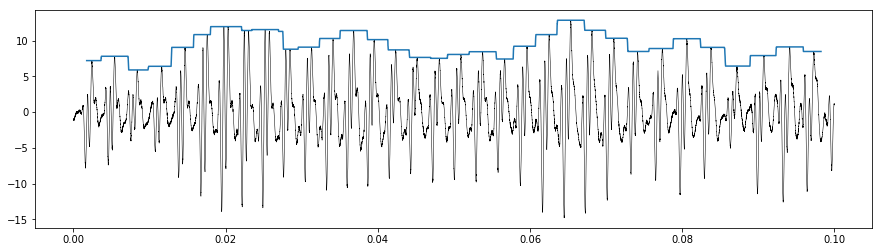

In [7]:

f, ax1 = plt.subplots()
f.set_figwidth(15)
ax1.plot(np.array(range(len(exx)))/ float(log_rate), data,color = 'black', linewidth=0.5 )
#ax1.scatter(xs[peakind], data[peakind])
mxs = pd.Series(data).rolling(700, center = True).max().tolist()
ax1.plot(np.linspace(0, np.max(np.array(range(len(exx)))/ float(log_rate)), num = len(mxs)), mxs)

In [8]:
from statsmodels.nonparametric.smoothers_lowess import lowess

mxs = pd.Series(data).rolling(700, center = True).max().tolist()
xs =  np.linspace(0, np.max(np.array(range(len(exx)))/ float(log_rate)), num = len(mxs))

mms = pd.Series(data).rolling(700, center = True).min().tolist()
xsm =  np.linspace(0, np.max(np.array(range(len(exx)))/ float(log_rate)), num = len(mms))

smth = lowess(endog = mxs, exog = xs, frac = 0.06, )
smth2 = lowess(endog = mms, exog = xsm, frac = 0.06)

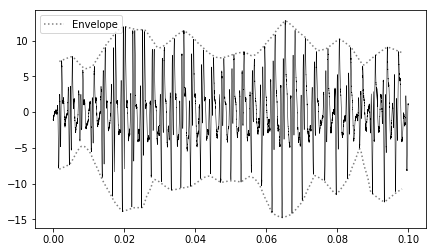

In [9]:
f, ax1 = plt.subplots()
f.set_figwidth(7)
ax1.plot(smth[:,0], smth[:, 1], linestyle= ':', color = 'grey', label = "Envelope")
ax1.plot(smth2[:,0], smth2[:, 1], linestyle= ':', color = 'grey')
ax1.plot(np.array(range(len(exx)))/ float(log_rate), data,color = 'black', linewidth=0.5 )
#ax1.scatter(xs[peakind], data[peakind])
mxs = pd.Series(data).rolling(700, center = True).max().tolist()
#ax1.plot(xs, mxs, linestyle= ':', color = 'grey')
#ax1.plot(xsm, mms, linestyle= ':', color = 'grey')
plt.legend(loc="upper left")


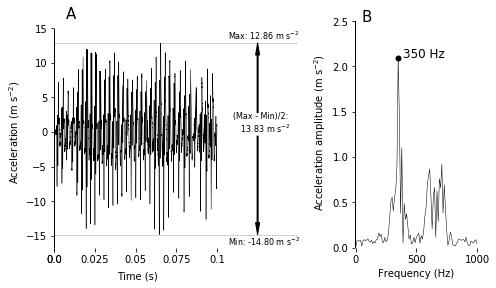

-14.8010257712 12.8624645199 13.8317451456


In [10]:
plt.figure(figsize=(7,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 

# create subplot 1
ax1 = plt.subplot(gs[0])
#ax1.plot(smth[:,0], smth[:, 1], linestyle= ':', color = 'grey', label = "Envelope")
#ax1.plot(smth2[:,0], smth2[:, 1], linestyle= ':', color = 'grey')
#plt.legend(loc="upper center")
ax1.plot(np.array(range(len(exx)))/ float(log_rate), data,color = 'black', linewidth=0.5 )
#ax1.set_ylabel("Acceleration (m s$^{-2})$")
ax1.set_ylabel("Acceleration (m s$^{-2})$")
ax1.set_xlabel("Time (s)")
ax1.set_frame_on(False)
ax1.axhline(y=np.max(data), color='grey', linestyle='--', linewidth = 0.5)
ax1.axhline(y=np.min(data), color='grey', linestyle='--', linewidth = 0.5)
ax1.set_xlim(-0.0002, 0.15)
ax1.set_ylim(-0.17*1000 / 10.19, 0.17*1000 / 10.19)

ax1.annotate(' ', xy=(0.125, np.min(data)), xytext=(0.125, -0.00),
            arrowprops=dict(facecolor='black', width = 1, headwidth = 4)
            )
ax1.annotate(' ', xy=(0.125, np.max(data)), xytext=(0.125, 0.014*1000 / 10.19),
            arrowprops=dict(facecolor='black', width = 1, headwidth = 4)
            )

ax1.annotate('(Max - Min)/2:\n   13.83 m s$^{-2}$', xy=(0.11, np.min(data)), xytext=(0.110, 0), 
             size=8
            )

ax1.annotate('Max: 12.86 m s$^{-2}$', xy=(0.11, np.min(data)), xytext=(0.107, np.max(data) + 0.1*np.std(data)), 
             size=8
            )
""
ax1.annotate('Min: -14.80 m s$^{-2}$', xy=(0.11, np.min(data)), xytext=(0.107, np.min(data) - 0.35*np.std(data)), 
             size=8
            )

ax1.plot([0,0.1], [ax1.get_ylim()[0], ax1.get_ylim()[0]], 'black', linewidth = 1)
ax1.plot([ax1.get_xlim()[0],ax1.get_xlim()[0]], [ax1.get_ylim()[0], 0.152*1000 / 10.19], 'black', linewidth = 1)
# add "L" shaped borders
#ax1.axvline(x = ax1.get_xlim()[0], linewidth = 1, color = 'black')
#ax1.axhline(y = ax1.get_ylim()[0], linewidth = 1, color = 'black')
ax1.axes.xaxis.set_ticklabels([0.000, 0.000,  0.025, 0.05, 0.075, 0.100])
ax1.axes.xaxis.set_ticks([0.000, 0.000,  0.025, 0.05, 0.075, 0.100])
ax1.xaxis.set_label_coords(0.342, -0.1)


def get_axis_limits(ax, scale=.98):
    return ax.get_xlim()[0] + np.diff(ax.get_xlim())*0.05, ax.get_ylim()[1]*scale     

# create subplot 2
ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)
ax2.annotate('350 Hz', xy=(domPK, beeFrqPwr), xytext=(domPK + 40, beeFrqPwr- 0.0001), size = 12
            )
ax2.set_xlim(-3, 1003)
ax2.set_ylabel('Acceleration amplitude (m s$^{-2})$')
ax2.set_xlabel('Frequency (Hz)')
plt.tight_layout()
ax2.set_frame_on(False)
#ax2.axes.yaxis.set_ticklabels([])
#ax2.axes.yaxis.set_ticks([])
ax2.set_ylim(0, 0.013*1000 / 10.19*2)

# add "L" shaped borders
#ax2.axvline(x = ax2.get_xlim()[0], linewidth = 1, color = 'black')
ax2.plot([ax2.get_xlim()[0],ax2.get_xlim()[0]], [ax2.get_ylim()[0], 0.0127*1000 / 10.17*2], 'black', linewidth = 1)
#ax2.axhline(y = ax2.get_ylim()[0], linewidth = 1, color = 'black')
ax2.plot([0,1500], [ax2.get_ylim()[0], ax2.get_ylim()[0]], 'black', linewidth = 1)


plt.savefig("/Users/cswitzer/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum_noAnnot_amp3.pdf", width = 7, height = 1.5)
ax1.annotate('A', xy=get_axis_limits(ax1), size = 15)
ax2.annotate('B', xy=get_axis_limits(ax2), size = 15)

plt.savefig("/Users/cswitzer/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum_amp3.pdf", width = 7, height = 1.5)
plt.show()

print(np.min(data), np.max(data), (np.max(data) - np.min(data))/2)


In [11]:
print(beeFrqPwr)

[ 2.09906008]


[ 2.09376804]


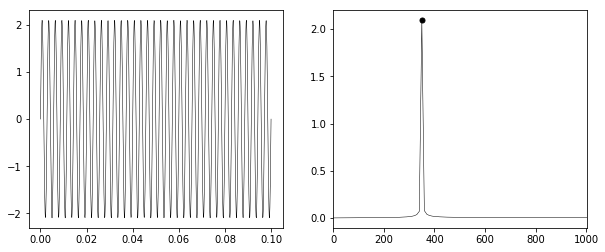

In [12]:
#fft practice
xx = np.linspace(0, 0.1, num = 1000)
act = 2.09906008*np.sin(350*2*np.pi*xx) 
#plt.plot(xx, act)

log_rate = len(xx)*(1/(np.max(xx)))

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act)/n *2 # fft computing and normalization
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

# create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-0, 1003)
print(beeFrqPwr)


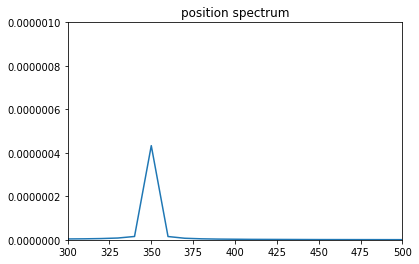

4.32945012508e-07


In [13]:
# calculate velocity and position spectrum
# ignore divide by 0 error
np.seterr(divide='ignore', invalid='ignore')

frequency = frq
ampSpec = abs(Y)
omega = (domPK*2*np.pi)

velocSpec = ampSpec / (frequency*2*np.pi)

posSpec = velocSpec / (frequency*2*np.pi)

plt.plot(frequency, posSpec)
plt.xlim(300, 500)
plt.ylim(0, 0.000001)
plt.title("position spectrum")
plt.show()
print(np.max(posSpec[frequency > 300]))



[  4.32945013e-07]


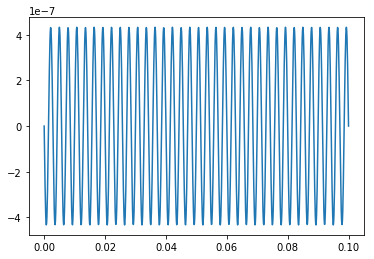

In [14]:
posSig = -beeFrqPwr*np.sin(domPK*2*np.pi*xx)  / ((domPK*2*np.pi)**2)
plt.plot(xx, posSig)
print(beeFrqPwr / ((domPK*2*np.pi)**2))

[ 2.09376804]


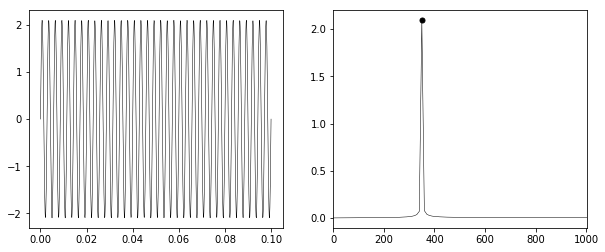

In [15]:
#fft practice
#xx = np.linspace(0, 0.1, num = 10000)
act = 2.09906008*np.sin(350*2*np.pi*xx) 
#plt.plot(xx, act)

#log_rate = 1000*10.0

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act)/n *2 # fft computing and normalization
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

# create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-0, 1003)
print(beeFrqPwr)



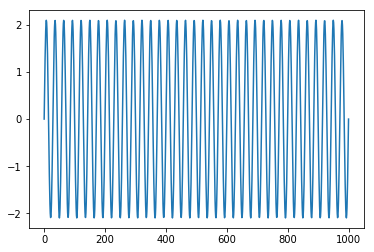

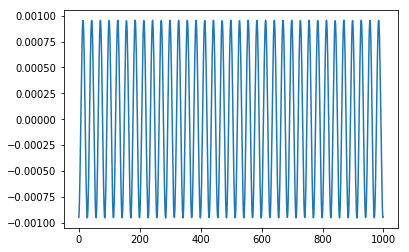

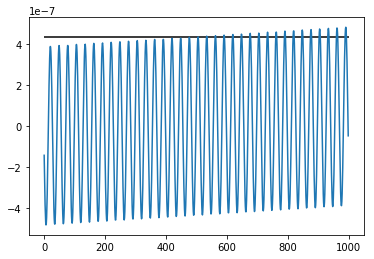

[  4.34694046e-07]


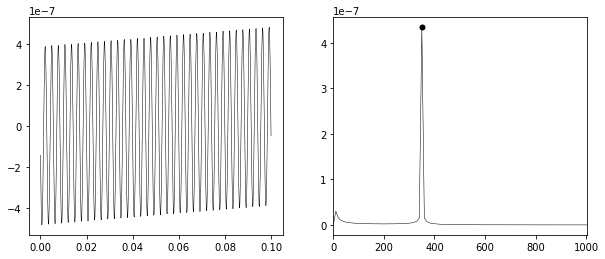

In [16]:
# double check numerical integral
#act = 7*np.sin(350*2*np.pi*xx) 

plt.plot(act)
#plt.plot(data)
plt.show()

vel = np.cumsum(act-np.mean(act))/log_rate
vel = vel - np.mean(vel)

plt.plot(vel)
plt.show()

pos = np.cumsum(vel-np.mean(vel))/log_rate
pos = pos - np.mean(pos)

plt.plot(pos)
plt.hlines(y = beeFrqPwr / ((domPK*2*np.pi)**2), xmin = 0, xmax = len(xx))
plt.show()


act1 = pos
#plt.plot(xx, act)

#log_rate = 1000*10.0

n =len(act1) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act1)/n *2 # fft computing and normalization
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]
pos_pwr = beeFrqPwr

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

# create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act1,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-0, 1003)
print(beeFrqPwr)

[ 2.09906008]


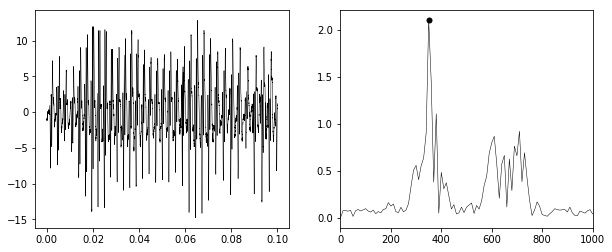

In [17]:
#fft practice
xx = np.linspace(0, 0.1, num = len(data))
act = data-np.mean(data)
#plt.plot(xx, act)

log_rate = 200000.0

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act)/n # fft computing and normalization
Y = Y[range(int(n/2))]*2

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

# create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-3, 1003)
print(beeFrqPwr)


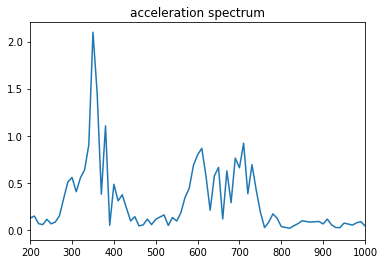

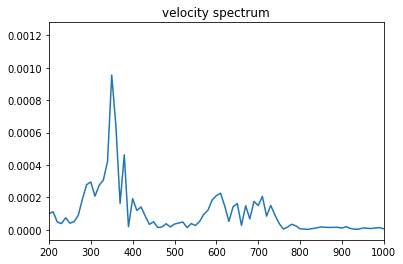

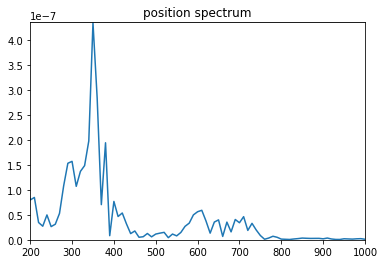

[  4.34694046e-07]


In [18]:


act = data-np.mean(data)
#plt.plot(xx, act)

log_rate = 200000.0

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act)/n # fft computing and normalization
Y = Y[range(int(n/2))]*2


#compare to analytical solution
frequency = frq
ampSpec = abs(Y)
omega = (domPK*2*np.pi)
plt.plot(frequency, ampSpec)
plt.title("acceleration spectrum")
plt.xlim(200, 1000)
plt.show()

velocSpec = ampSpec / (frq*2*np.pi)
plt.plot(frequency, velocSpec)
plt.xlim(200, 1000)
plt.title("velocity spectrum")
plt.show()

posSpec = velocSpec / (frq*2*np.pi)
#plt.vlines(ymin =0 , ymax = 0.00002, x = 350, colors = 'grey')
plt.hlines(xmin = 200, xmax = 1000, y = pos_pwr , colors= 'grey')
plt.plot(frequency, posSpec)
plt.xlim(200, 1000)
plt.ylim(0, pos_pwr)
plt.title("position spectrum")

plt.show()
print(pos_pwr)


[ 0.49977041]


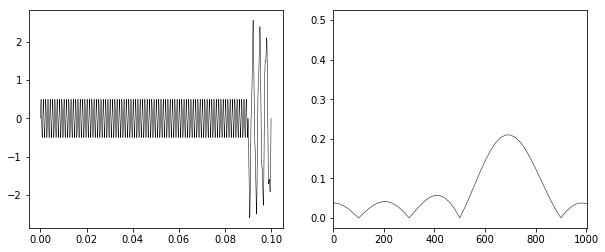

In [19]:
# See how fft works with partial signal

#fft practice
xx = np.linspace(0, 0.1, num = 10000)
act = 2.09906008*np.sin(350*2*np.pi*xx) * (xx > 0.09) + 0.5*np.sin(1000*2*np.pi*xx)

#plt.plot(xx, act)

#log_rate = 1000*10.0

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act)/n *2 # fft computing and normalization
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

# create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-0, 1003)
print(beeFrqPwr)



In [20]:
def readMyFile(filename):
    
    '''Read in csv 10x faster than pandas'''
    
    tmpdta = []
 
    with open(filename, newline="\n") as csvDataFile:
        csvReader = csv.reader(csvDataFile, delimiter=' ', quoting=csv.QUOTE_NONNUMERIC)
        for row in csvReader:
            tmpdta.append(row)
 
    return(pd.DataFrame(np.transpose(tmpdta)))

In [21]:
# fft class

class fft_:
    
    '''
    Does fft spectrum with accelerometer data
    
    '''
    
    def fit(self, timesteps, signal):
        self.timesteps = timesteps
        self.signal = signal - np.mean(signal)

        log_rate = len(self.timesteps)*(1/(np.round(np.max(self.timesteps), decimals = 1)))

        n =len(self.signal) # length of the signal
        k = np.arange(n, step = 1)
        T = n/log_rate
        frq = k/T # two sides frequency range
        frq = frq[range(int(n/2))] # one side frequency range

        # fft computing and normalization (note that *2 is so that it is scaled properly)
        Y = np.fft.fft(self.signal)/n *2 
        Y = Y[range(int(n/2))]

        # calculate top frequency
        ind = np.argpartition(abs(Y), -4)[-4:]
        
        # Find highest point on the spectrum
        self.peakFrq = frq[ind[::-1]]
        self.pwr = (abs(Y)[ind[::-1]])
        
        self.dominant_freq = [x for (y,x) in sorted(zip(self.pwr,self.peakFrq), reverse = True)][0]
        self.max_amp = self.pwr[self.peakFrq == self.dominant_freq]
        self.Y = Y
        self.frq = frq
        
        # calculate spectrum for position
#         ampSpec = abs(self.Y)
#         velocSpec = ampSpec / (self.frq*2*np.pi)
#         self.posSpec = velocSpec / (self.frq*2*np.pi)
        
#         self.posSpec = self.posSpec[self.frq > 150]
#         self.frq2 = self.frq[self.frq > 150]
        
#         # calculate top frequency
#         ind2 = np.argpartition(self.posSpec, -4)[-4:]
        
#         # Find highest point on the spectrum
#         self.peakFrq_pos = self.frq2[ind2[::-1]]
#         self.pwr_pos = (self.posSpec[ind2[::-1]])
        
#         self.dominant_freq_pos = [x for (y,x) in sorted(zip(self.pwr_pos,self.peakFrq_pos), reverse = True)][0]
#         self.max_amp_pos = self.pwr_pos[self.peakFrq_pos == self.dominant_freq_pos]
        
        self.amp_pos = self.max_amp/(self.dominant_freq * 2 * np.pi)**2
        
        
        
    def plot_fft(self):    
        plt.figure(figsize=(10,4))
        gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

        # create subplot 1
        ax1 = plt.subplot(gs[0])
        ax1.plot(self.timesteps,self.signal, color = 'black', linewidth=0.5)
    
        # subplot 2
        ax2 = plt.subplot(gs[1])
        ax2.plot(self.frq, abs(self.Y), color = "black", linewidth=0.5)
        ax2.plot(self.dominant_freq, self.max_amp,'o', color = 'black', markersize = 5)
        ax2.set_xlim(-0, 1003)
        
        
#         ax3 = plt.subplot(gs[2])
#         ax3.plot(self.frq2, self.posSpec, color = "black", linewidth=0.5)
#         ax3.plot(self.dominant_freq_pos, self.max_amp_pos,'o', color = 'black', markersize = 5)
#         ax3.set_xlim(-0, 1003)
        
#         print(self.dominant_freq_pos, self.max_amp_pos, self.max_amp/(self.dominant_freq * 2 * np.pi)**2)
        plt.show()

In [22]:
# forget about envelope for now -- just find position amplitude for all recordings
HeavyLight = "/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/02_HeavyLight_cleaned.csv"
hl = pd.read_csv(HeavyLight)

dd = "/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/SonicationBehavior_HeavyLight/"

allFolders = np.unique(hl.accFileAndFolder)


for foldNum in range(len(allFolders)):
    tmpF = os.path.join(dd, allFolders[foldNum])
    tmpDF = pd.read_csv(tmpF, header = None)
    tmpDF.columns = ["frq", "MaxMinAmp", "fname_short", "dd", "TT", "AA", "BB"]
    tmpDF.fname_short = [ff.strip() for ff in tmpDF.fname_short]



    fold = os.path.join(dd, allFolders[foldNum]).split("_ampFreq.txt")[0]

    accRecs = [f for f in os.listdir(fold) if not f.startswith(".") ]



    for ii in range(len(accRecs)):
        # read in data
        ar = accRecs[ii]
        tmpdf1 = readMyFile(os.path.join(fold, ar))

        # compute fft and save
        fft = fft_()

        # convert signal to m/s/s (*1000 / 10.17)
        fft.fit(timesteps = tmpdf1.iloc[:,0 ], signal = np.array(tmpdf1.iloc[:,1]*1000 / 10.17))
        #print(fft.dominant_freq, fft.max_amp)

        if ii == 0:
            tmpDF2 = np.hstack([ar, fft.dominant_freq, fft.max_amp[0], fft.amp_pos])

        else:
            tmpDF2 = np.vstack([tmpDF2, np.hstack([ar, int(fft.dominant_freq), fft.max_amp[0], fft.amp_pos])])
        
        #print(fft.dominant_freq)
        #fft.plot_fft()

    tmpDF2 = pd.DataFrame(tmpDF2)
    tmpDF2.columns = ["filename", "freq", "acc_amplitude_fft", "pos_amplitude_fft" ]
    tmpDF2.sort_values(by = "filename", inplace = True)
    tmpDF2.reset_index(inplace = True, drop = True)
    tmpDF2["fname_short"] = ["_".join(tmpDF2.filename[jj].split("_")[0:8]) for jj in range(len(tmpDF2))]


    tmpDF3 = pd.merge(tmpDF2, tmpDF, how = "outer", left_on = "fname_short", right_on = "fname_short")
    tmpDF3["Folder"] = fold.split("/")[-2]

    if(foldNum == 0):
        bigDF = pd.DataFrame(tmpDF3) 
    else:
        bigDF = pd.concat([bigDF, tmpDF3])
    
    print(foldNum)

bigDF.reset_index(drop = True, inplace = True)
bigDF.freq = pd.to_numeric(bigDF.freq)
bigDF.acc_amplitude_fft = pd.to_numeric(bigDF.acc_amplitude_fft)
bigDF.pos_amplitude_fft = pd.to_numeric(bigDF.pos_amplitude_fft)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


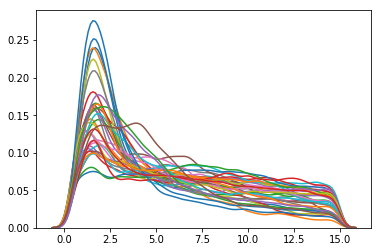

In [486]:
bigM = []

for foldNum in  range(len(allFolders)):
    tmpF = os.path.join(dd, allFolders[foldNum])
    tmpDF = pd.read_csv(tmpF, header = None)
    tmpDF.columns = ["frq", "MaxMinAmp", "fname_short", "dd", "TT", "AA", "BB"]
    tmpDF.fname_short = [ff.strip() for ff in tmpDF.fname_short]



    fold = os.path.join(dd, allFolders[foldNum]).split("_ampFreq.txt")[0]

    accRecs = [f for f in os.listdir(fold) if not f.startswith(".") ]

    mm = []

    for ii in range(len(accRecs)):
            # read in data
            ar = accRecs[ii]
            tmpdf1 = readMyFile(os.path.join(fold, ar))
            signal = (tmpdf1.iloc[:,1] - np.mean(tmpdf1.iloc[:,1]))*1000 / 10.17
            times = tmpdf1.iloc[:,0]
            mxs = pd.Series(abs(signal)).rolling(int(tmpdf1.shape[0]/28), center = True, min_periods = 1).max().tolist()

            mm.append(np.unique(mxs))

    out = np.concatenate(mm).ravel()
    bigM.append(out)
    print(foldNum)
    #plt.hist(out[out <10], bins = 30, density = True)
    #plt.xlim(0, 10)
    sns.kdeplot(np.array(out[out <15]), bw=0.3)
    #plt.show()

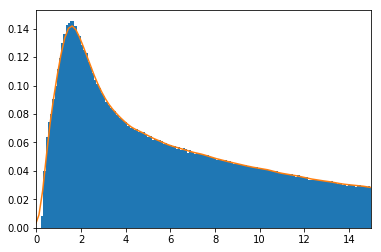

In [496]:

zz = np.concatenate(bigM).ravel()
plt.hist(zz[zz < 20], density = True, bins = 200)
sns.kdeplot(zz[zz < 20], bw=0.2)
plt.xlim(0, 15)
plt.show()

714


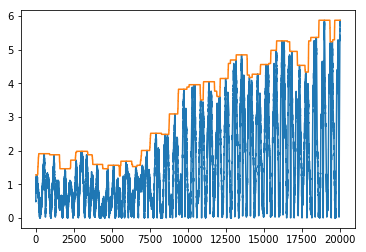

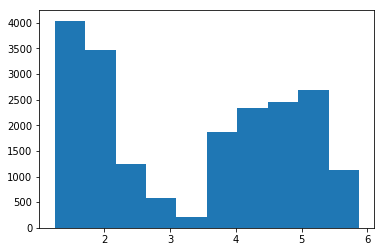

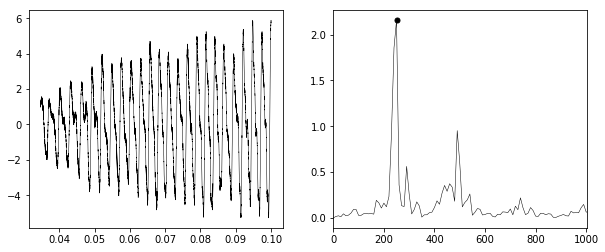

In [446]:
       


ii +=1
ar = accRecs[ii]
tmpdf1 = readMyFile(os.path.join(fold, ar))

signal = (tmpdf1.iloc[:,1] - np.mean(tmpdf1.iloc[:,1]))*1000 / 10.17
times = tmpdf1.iloc[:,0]
mxs = pd.Series(abs(signal)).rolling(int(tmpdf1.shape[0]/28), center = True, min_periods = 1).max().tolist()
print(int(tmpdf1.shape[0]/28))
plt.plot(abs(signal))
plt.plot(mxs)
plt.show()

plt.hist(mxs)
plt.show()

t2 = times[np.array(mxs) > 2.0]
s2 = signal[np.array(mxs) > 2.0]

fft = fft_()
fft.fit(t2, s2)
fft.plot_fft()

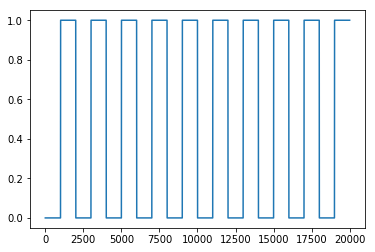

In [319]:
plt.plot(np.mod(times, 0.01) > 0.005) 

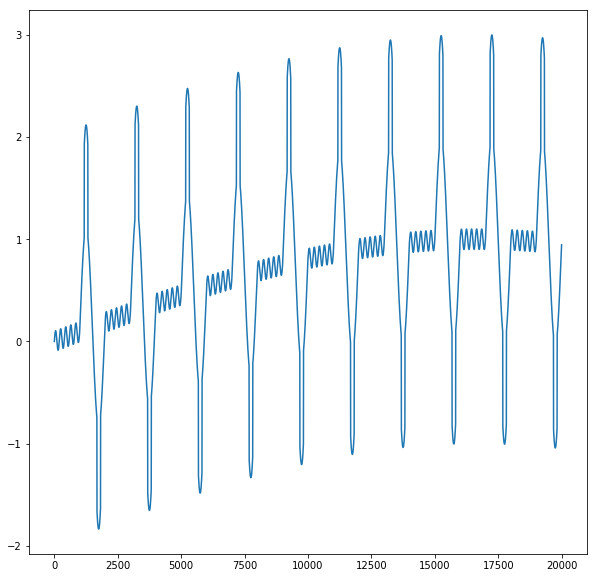

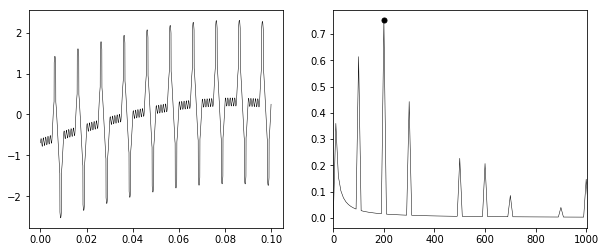

In [442]:
sig1_amp = np.round(np.mod(times, 0.01), decimals = 1)


signal = (np.mod(times, 0.01) > 0.005)*np.sin(2* np.pi * (times* 200)) #+ 0.2*np.random.randn(len(times))
signal[abs(signal)>0.9] = 2*np.sin(2* np.pi * (times[abs(signal)>0.9]* 200))

signal = signal + ~(np.mod(times, 0.01) > 0.005)*np.sin(2* np.pi * times* 1000)*0.1 + np.sin(2* np.pi * (times* 3))


#signal = np.sin(2* np.pi * (times* 100))
#signal[times < 0.07] = np.sin(2* np.pi * times* 1000)*0.1


#signal = 0.8*np.sin(2* np.pi * times* 400) + np.sin(2* np.pi * (times* 200 + 400))


#sig1 = np.sin(2* np.pi * times* 50)


#signal = 5.44 * np.sin(2* np.pi * times* 200) + 4 * np.sin(2* np.pi * times* 400)

#signal = lowess(signal + 0.01*np.random.randn(len(times)), times, frac = 1/20)[:,1]
plt.figure(figsize = [10,10])
plt.plot(signal)
#plt.hlines(xmin = 0, xmax = 20000, y = 0.54)

fft = fft_()
fft.fit(times, signal)
fft.plot_fft()

In [443]:
# analytical calculate position amplitude
2.0 / (np.pi * 2 * 100)**2

5.066059182116889e-06

[  4.76451708e-07]


(0, 1000)

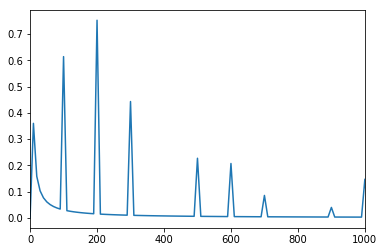

In [444]:
plt.plot(fft.frq,abs(fft.Y))
print(fft.amp_pos)
plt.xlim(0, 1000)

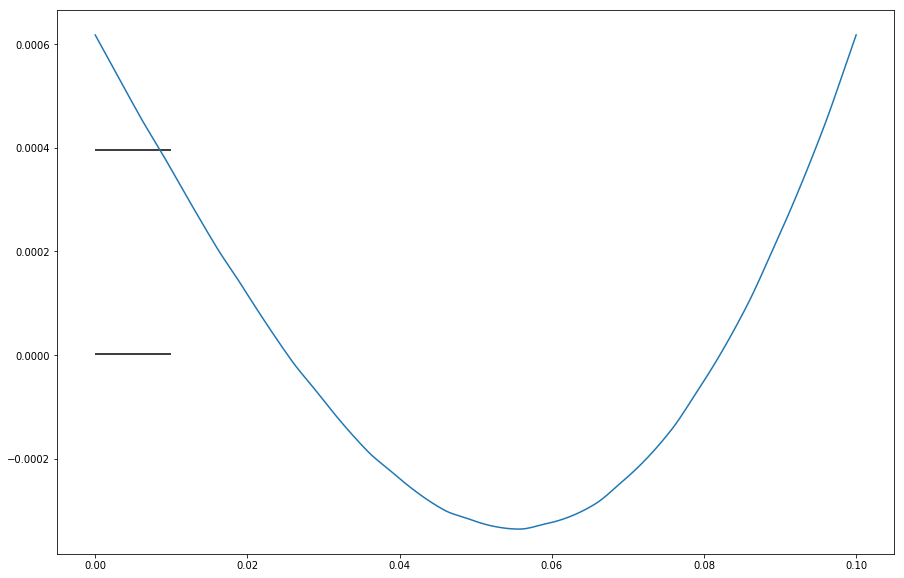

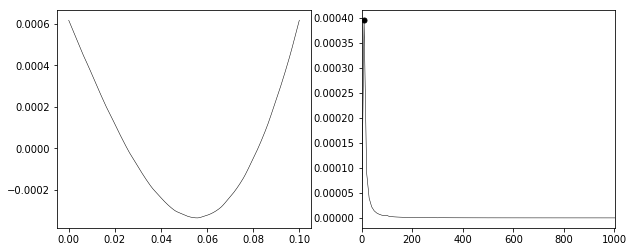

[ 0.00039569]


In [445]:
vel = np.cumsum(signal)/log_rate

pos = np.cumsum(vel - np.mean(vel)) / log_rate

aa = fft_()
aa.fit(times, pos-np.mean(pos))
plt.figure(figsize = [15,10])
plt.plot(times, pos - np.mean(pos))
plt.hlines(xmin = 0, xmax = 0.01, y = [aa.max_amp, 1.8e-06])
aa.plot_fft()
print(aa.max_amp)

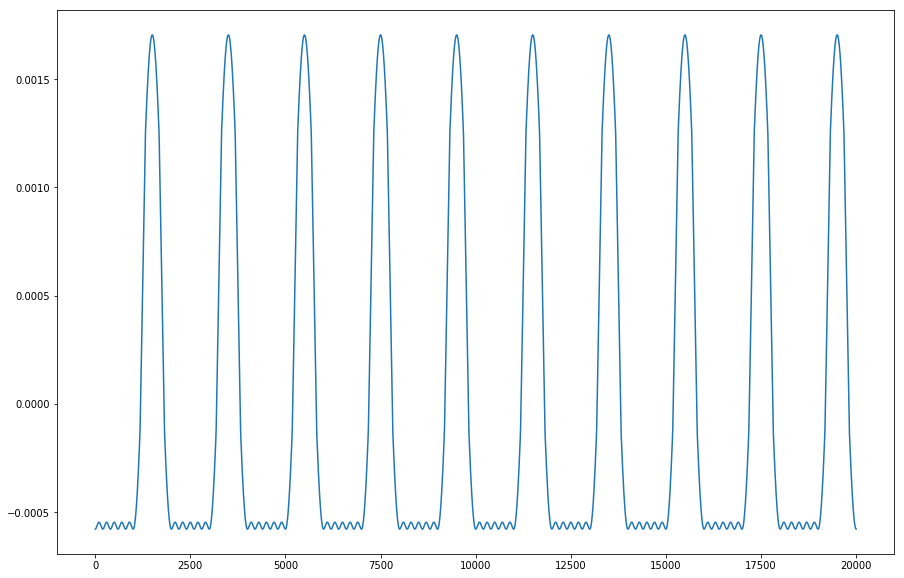

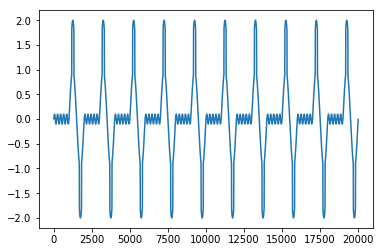

In [432]:
v2 = np.diff(pos) *log_rate
a2 = np.diff(v2-np.mean(v2)) * log_rate
plt.figure(figsize = [15,10])

plt.plot(v2-np.mean(v2))
plt.show()
plt.plot(a2)
plt.show()


In [164]:
import pdvega  # import adds vgplot attribute to pandas



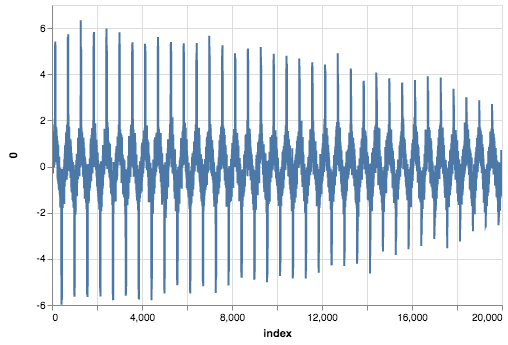

In [168]:
sig1 = np.sin(2* np.pi * times* 350)


signal = 5*np.sin(2* np.pi * times* 352)
signal[abs(sig1) < 0.99] =  sig1

#signal[signal < 0] =  signal[signal < 0]*5
signal = signal + np.random.randn(len(times))*0.4

signal.vgplot.line()

714


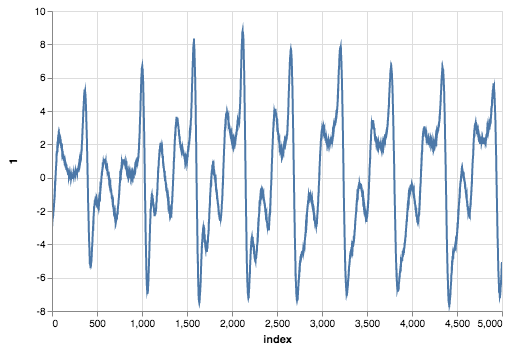

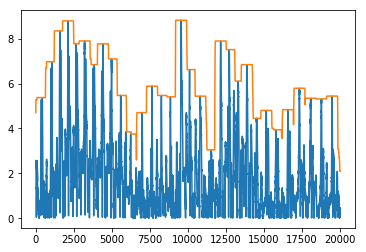

In [179]:
ii +=1
ar = accRecs[ii]
tmpdf1 = readMyFile(os.path.join(fold, ar))

signal = (tmpdf1.iloc[:,1] - np.mean(tmpdf1.iloc[:,1]))*1000 / 10.17
times = tmpdf1.iloc[:,0]
mxs = pd.Series(abs(signal)).rolling(int(tmpdf1.shape[0]/28), center = True, min_periods = 1).max().tolist()
print(int(tmpdf1.shape[0]/28))
plt.plot(abs(signal))
plt.plot(mxs)


signal[0:5000].vgplot.line()



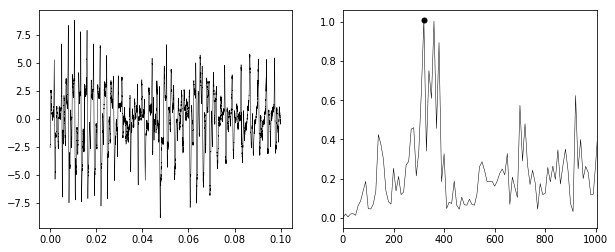

In [180]:
fft = fft_()
fft.fit(times, signal-np.mean(signal))
fft.plot_fft()

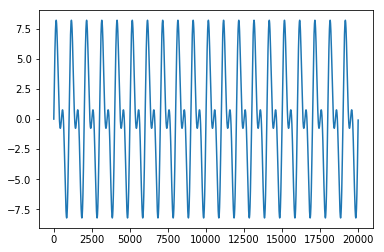

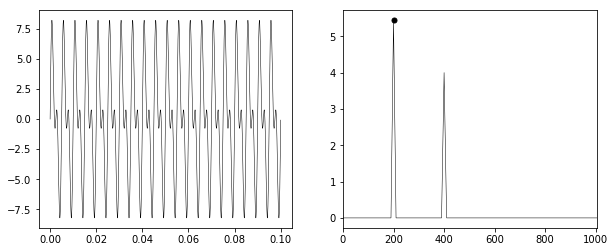

In [262]:
sig1 = np.sin(2* np.pi * times* 50)


signal = 5.44 * np.sin(2* np.pi * times* 200) + 4 * np.sin(2* np.pi * times* 400)
plt.plot(signal)

fft = fft_()
fft.fit(times, signal)
fft.plot_fft()

In [57]:
len(times)

20000

In [23]:
print(bigDF.shape)
bigDF.head()

(3939, 12)


,filename,freq,acc_amplitude_fft,pos_amplitude_fft,fname_short,frq,MaxMinAmp,dd,TT,AA,BB,Folder
0,2016_10_12__10_44_08_724_220_450_test.txt,310.0,0.845406,2.228343e-07,2016_10_12__10_44_08_724,310.0,0.39296,1,T,0,5,Bee10_12Oct2016_Hive3_S_W
1,2016_10_12__10_44_09_472_220_450_test.txt,380.0,5.585222,9.797461e-07,2016_10_12__10_44_09_472,380.0,0.67203,2,T,0,5,Bee10_12Oct2016_Hive3_S_W
2,2016_10_12__10_44_10_228_220_450_test.txt,340.0,9.654510,2.115498e-06,2016_10_12__10_44_10_228,340.0,1.04877,3,T,0,5,Bee10_12Oct2016_Hive3_S_W
3,2016_10_12__10_44_10_800_220_450_test.txt,340.0,8.536824,1.870591e-06,2016_10_12__10_44_10_800,340.0,1.22822,4,T,0,5,Bee10_12Oct2016_Hive3_S_W
4,2016_10_12__10_44_12_011_220_450_test.txt,310.0,0.971834,2.561585e-07,2016_10_12__10_44_12_011,310.0,0.36700,5,T,0,5,Bee10_12Oct2016_Hive3_S_W


In [24]:
print(hl.shape)
hl.datetime = [ff.strip() for ff in hl.datetime]
hl.head()

(2360, 12)


,freq,amp,datetime,rewNum,accFile,beeID,hive,IT,accFileAndFolder,dateFrozenOrMarked,treatment,amp_acc
0,250.0,0.17945,2016_09_28__09_59_13_112,1,2016_09_28__09_59_13_112_220_450_test.txt,7,3,3.98,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,sham,17.645034
1,300.0,0.56657,2016_09_28__09_59_14_520,2,2016_09_28__09_59_14_520_220_450_test.txt,7,3,3.98,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,sham,55.709931
2,400.0,0.68371,2016_09_28__09_59_15_030,3,2016_09_28__09_59_15_030_220_450_test.txt,7,3,3.98,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,sham,67.228122
3,410.0,0.80118,2016_09_28__09_59_15_707,4,2016_09_28__09_59_15_707_220_450_test.txt,7,3,3.98,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,sham,78.778761
4,370.0,0.52666,2016_09_28__09_59_16_277,5,2016_09_28__09_59_16_277_220_450_test.txt,7,3,3.98,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,sham,51.785644


In [25]:
# merge bigDF and hl

totalDF = pd.merge(bigDF, hl, left_on = ["fname_short", "freq"], right_on=["datetime", "freq"], how = "inner")
totalDF.shape

(2360, 23)

In [26]:
totalDF.head()

,filename,freq,acc_amplitude_fft,pos_amplitude_fft,fname_short,frq,MaxMinAmp,dd,TT,AA,...,datetime,rewNum,accFile,beeID,hive,IT,accFileAndFolder,dateFrozenOrMarked,treatment,amp_acc
0,2016_10_12__10_44_08_724_220_450_test.txt,310.0,0.845406,2.228343e-07,2016_10_12__10_44_08_724,310.0,0.39296,1,T,0,...,2016_10_12__10_44_08_724,1,2016_10_12__10_44_08_724_220_450_test.txt,10,3,4.09,Bee10_12Oct2016_Hive3_S_W/2016_10_12__10_44_03...,12-Oct-16,sham,38.639135
1,2016_10_12__10_44_09_472_220_450_test.txt,380.0,5.585222,9.797461e-07,2016_10_12__10_44_09_472,380.0,0.67203,2,T,0,...,2016_10_12__10_44_09_472,2,2016_10_12__10_44_09_472_220_450_test.txt,10,3,4.09,Bee10_12Oct2016_Hive3_S_W/2016_10_12__10_44_03...,12-Oct-16,sham,66.079646
2,2016_10_12__10_44_10_228_220_450_test.txt,340.0,9.654510,2.115498e-06,2016_10_12__10_44_10_228,340.0,1.04877,3,T,0,...,2016_10_12__10_44_10_228,3,2016_10_12__10_44_10_228_220_450_test.txt,10,3,4.09,Bee10_12Oct2016_Hive3_S_W/2016_10_12__10_44_03...,12-Oct-16,sham,103.123894
3,2016_10_12__10_44_10_800_220_450_test.txt,340.0,8.536824,1.870591e-06,2016_10_12__10_44_10_800,340.0,1.22822,4,T,0,...,2016_10_12__10_44_10_800,4,2016_10_12__10_44_10_800_220_450_test.txt,10,3,4.09,Bee10_12Oct2016_Hive3_S_W/2016_10_12__10_44_03...,12-Oct-16,sham,120.768928
4,2016_10_12__10_44_12_011_220_450_test.txt,310.0,0.971834,2.561585e-07,2016_10_12__10_44_12_011,310.0,0.36700,5,T,0,...,2016_10_12__10_44_12_011,5,2016_10_12__10_44_12_011_220_450_test.txt,10,3,4.09,Bee10_12Oct2016_Hive3_S_W/2016_10_12__10_44_03...,12-Oct-16,sham,36.086529


In [27]:
# change column names
totalDF2 =totalDF.rename(columns = {'amp_acc':'MinMax_amp_acc_m/s/s', 
                                    'amp': 'MinMax_amp_Volts', 
                                   'acc_amplitude_fft': 'acc_amplitude_fft_m/s/s', 
                                    'pos_amplitude_fft': 'pos_amplitude_fft_m'
                                   })
totalDF2.drop(["frq", "TT", "AA", "BB", "dd", "fname_short", "MaxMinAmp"], axis = 1, inplace = True)
totalDF2.head()


,filename,freq,acc_amplitude_fft_m/s/s,pos_amplitude_fft_m,Folder,MinMax_amp_Volts,datetime,rewNum,accFile,beeID,hive,IT,accFileAndFolder,dateFrozenOrMarked,treatment,MinMax_amp_acc_m/s/s
0,2016_10_12__10_44_08_724_220_450_test.txt,310.0,0.845406,2.228343e-07,Bee10_12Oct2016_Hive3_S_W,0.39296,2016_10_12__10_44_08_724,1,2016_10_12__10_44_08_724_220_450_test.txt,10,3,4.09,Bee10_12Oct2016_Hive3_S_W/2016_10_12__10_44_03...,12-Oct-16,sham,38.639135
1,2016_10_12__10_44_09_472_220_450_test.txt,380.0,5.585222,9.797461e-07,Bee10_12Oct2016_Hive3_S_W,0.67203,2016_10_12__10_44_09_472,2,2016_10_12__10_44_09_472_220_450_test.txt,10,3,4.09,Bee10_12Oct2016_Hive3_S_W/2016_10_12__10_44_03...,12-Oct-16,sham,66.079646
2,2016_10_12__10_44_10_228_220_450_test.txt,340.0,9.654510,2.115498e-06,Bee10_12Oct2016_Hive3_S_W,1.04877,2016_10_12__10_44_10_228,3,2016_10_12__10_44_10_228_220_450_test.txt,10,3,4.09,Bee10_12Oct2016_Hive3_S_W/2016_10_12__10_44_03...,12-Oct-16,sham,103.123894
3,2016_10_12__10_44_10_800_220_450_test.txt,340.0,8.536824,1.870591e-06,Bee10_12Oct2016_Hive3_S_W,1.22822,2016_10_12__10_44_10_800,4,2016_10_12__10_44_10_800_220_450_test.txt,10,3,4.09,Bee10_12Oct2016_Hive3_S_W/2016_10_12__10_44_03...,12-Oct-16,sham,120.768928
4,2016_10_12__10_44_12_011_220_450_test.txt,310.0,0.971834,2.561585e-07,Bee10_12Oct2016_Hive3_S_W,0.36700,2016_10_12__10_44_12_011,5,2016_10_12__10_44_12_011_220_450_test.txt,10,3,4.09,Bee10_12Oct2016_Hive3_S_W/2016_10_12__10_44_03...,12-Oct-16,sham,36.086529


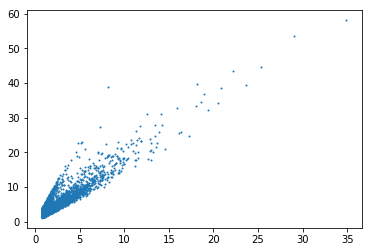

In [40]:
plt.scatter(x = totalDF2['acc_amplitude_fft_m/s/s'], y = totalDF2['pos_amplitude_fft_m']*10**7, s= 1)

In [31]:
# write to file
totalDF2.to_csv("/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/02_1_HeavyLight_cleaned_posAdded.csv", index = False)

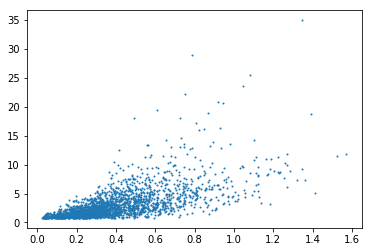

In [33]:
plt.scatter(x = totalDF2.MinMax_amp_Volts, y = totalDF2['acc_amplitude_fft_m/s/s'], s = 1)

In [ ]:
ar = accRecs[2]
stt = time.time()
dta = readMyFile(os.path.join(fold, ar))


#fft practice

#xx = np.linspace(0, 0.1, num = 1000)
#act = 2.09906008*np.sin(350*2*np.pi*xx) 
xx = dta.iloc[:,0 ]
act = dta.iloc[:,1]*1000 / 10.17

#plt.plot(xx, act)

log_rate = len(xx)*(1/(np.max(xx)))

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range


# fft computing and normalization (note that *2 is so that it is scaled properly)
Y = np.fft.fft(act)/n *2 
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

#create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-0, 1003)
print(beeFrqPwr)

print(time.time() - stt)

In [ ]:
# processing -- find signal envelope

from scipy.signal import hilbert
duration = 0.1
fs = log_rate/2
samples = int(fs*duration)
t = np.arange(samples) / fs

signal = act
#signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
#instantaneous_frequency = (np.diff(instantaneous_phase) /
#                           (2.0*np.pi) * fs)


fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()


In [ ]:
recDir = os.listdir("/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/SonicationBehavior_HeavyLight/Bee31_19Oct2016_Hive3_W_S/2016_10_19__11_23_02")
recDir = [ii for ii in recDir if not ii.startswith(".")]

print(len(recDir))
dct = "/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/SonicationBehavior_HeavyLight/Bee31_19Oct2016_Hive3_W_S/2016_10_19__11_23_02"
f = recDir[0]

# load in all data
def readCenter(f):
    tmp = np.transpose(pd.read_csv(os.path.join(dct, f), sep = " ", header = None))
    tmp.iloc[:,1] = tmp.iloc[:,1] - np.mean(tmp.iloc[:,1])
    tmp["name"] = f
    print(f)
    return(tmp)

df = pd.concat( [readCenter(f) for f in recDir] )
#np.transpose(pd.read_csv(os.path.join(dct, f), sep = " ", header = None))
#combined_csv = 

df.head()

In [ ]:
direct = "/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/SonicationBehavior_HeavyLight/Bee2_27Sept_Hive4_S_W/2016_09_27__11_54_44"

recDir = os.listdir(direct)
recDir = [ii for ii in recDir if not ii.startswith(".")]

print(len(recDir))
dct = direct
f = recDir[0]

# load in all data
def readCenter(f):
    tmp = np.transpose(pd.read_csv(os.path.join(dct, f), sep = " ", header = None))
    tmp.iloc[:,1] = tmp.iloc[:,1] - np.mean(tmp.iloc[:,1])
    tmp["name"] = f
    print(f)
    return(tmp)

df = pd.concat( [readCenter(f) for f in recDir] )
#np.transpose(pd.read_csv(os.path.join(dct, f), sep = " ", header = None))
#combined_csv = 

df.head()

In [ ]:
# calculate running mean and look at histogram
d2 = df

signal = np.array(d2.iloc[:,1]*1000 / 10.17) # convert from V to m/s/s
act = signal
times = d2.iloc[:,0]
xx = times


f, ax1 = plt.subplots()
f.set_figwidth(15)
ax1.plot( abs(signal),color = 'black', linewidth=0.5 )
#ax1.scatter(xs[peakind], data[peakind])
mxs = pd.Series(abs(signal)).rolling(int(d2.shape[0]/28/124), center = True, min_periods = 1).max().tolist()
print(int(d2.shape[0]/28))
ax1.plot(mxs)
plt.show()

plt.hist(np.array(mxs)[~np.isnan(np.array(mxs))], bins = 50)
plt.vlines(ymin = 0, ymax = 175000, x = 5)
plt.show()

In [ ]:
plt.plot(mxs[0:20000])

In [ ]:
dct = direct
recDir = os.listdir(direct)
recDir = [ii for ii in recDir if not ii.startswith(".")]
fle = os.path.join(dct, recDir[ff])
ff+=1

d2 = np.transpose(pd.read_csv(fle, sep = " ", header = None))

signal = d2.iloc[:,1]*1000 / 10.17 # convert from V to m/s/s
act = signal-np.mean(signal)
times = d2.iloc[:,0]
xx = times

log_rate = 200000.0

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act)/n # fft computing and normalization
Y = Y[range(int(n/2))]*2

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

# create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-3, 1003)
print(beeFrqPwr)


#plt.plot(d2.iloc[:,0], d2.iloc[:,1])
plt.show()


f, ax1 = plt.subplots()
f.set_figwidth(15)
ax1.plot(times, abs(signal),color = 'black', linewidth=0.5 )
#ax1.scatter(xs[peakind], data[peakind])
mxs = pd.Series(abs(signal)).rolling(int(d2.shape[0]/28), center = True, min_periods = 1).max().tolist()
print(int(d2.shape[0]/28))
ax1.plot(times, mxs)

from statsmodels.nonparametric.smoothers_lowess import lowess


ssmp = np.array((np.linspace(0, len(mxs), num = 100) - 1).astype(int))
smth = lowess(endog = np.array(mxs)[ssmp], exog = np.array(times)[ssmp], frac = 0.06)
ax1.plot(times[ssmp], smth[:,1])
plt.show()
plt.hist(np.array(mxs)[~np.isnan(np.array(mxs))])
plt.show()


#________________________
# calculate fft for subset of data

df3 = d2.iloc[np.array(mxs) > 1.5, :].reset_index(drop=True)
signal = df3.iloc[:,1]*1000 / 10.17
act = signal-np.mean(signal)
times = df3.iloc[:,0]
xx = times

log_rate = 200000.0

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act)/n # fft computing and normalization
Y = Y[range(int(n/2))]*2

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

# create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-3, 1003)
print(beeFrqPwr)


#plt.plot(d2.iloc[:,0], d2.iloc[:,1])
plt.show()


f, ax1 = plt.subplots()
f.set_figwidth(15)
ax1.plot(abs(signal),color = 'black', linewidth=0.5 )
#ax1.scatter(xs[peakind], data[peakind])
mxs = pd.Series(abs(signal)).rolling(int(d2.shape[0]/28), center = True).max().tolist()
print(int(d2.shape[0]/28))
ax1.plot(np.array(mxs))

In [ ]:
plt.plot(smth[:,1])

In [ ]:
# print system info
import IPython
print(IPython.sys_info())

In [ ]:
# convert to html, so ppl don't have to run python to see code
!jupyter nbconvert --to html 008_ExampleFigureSpectrum